In [48]:
# 6.5 Fashion MNIST 데이터세트 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


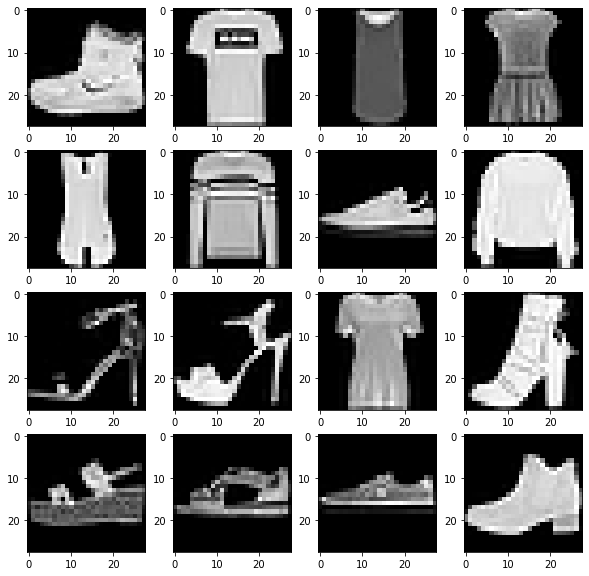

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [46]:
import matplotlib.pyplot as plt

# 전체 그래프의 크기를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))

for c in range(16):
    # 4행 4열로 지정한 그리드에서 c+1 번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채우게 됩니다.
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28, 28), cmap='gray')

plt.show()

# 훈련 데이터의 1번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16])

In [19]:
# 컨벌루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size(3, 3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 7s 163us/sample - loss: 0.4622 - accuracy: 0.8354 - val_loss: 0.4044 - val_accuracy: 0.8499
Epoch 2/25
45000/45000 [==============================] - 7s 149us/sample - loss: 0.3323 - accuracy: 0.8778 - val_loss: 0.3669 - val_accuracy: 0.8679
Epoch 3/25
45000/45000 [==============================] - 7s 150us/sample - loss: 0.2798 - accuracy: 0.8970 - val_loss: 0.3787 - val_accuracy: 0.8715
Epoch 4/25
45000/45000 [==============================] - 7s 148us/sample - loss: 0.2405 - accuracy: 0.9110 - val_loss: 0.3700 - val_accuracy: 0.8786
Epoch 5/25
45000/45000 [==============================] - 7s 153us/sample - loss: 0.2038 - accuracy: 0.9244 - val_loss: 0.4275 - val_accuracy: 0.8663
Epoch 6/25
45000/45000 [==============================] - 7s 148us/sample - loss: 0.1806 - accuracy: 0.9327 - val_loss: 0.4405 - val_accuracy: 0.8717
Epoch 7/25
45000/45000 [==========================

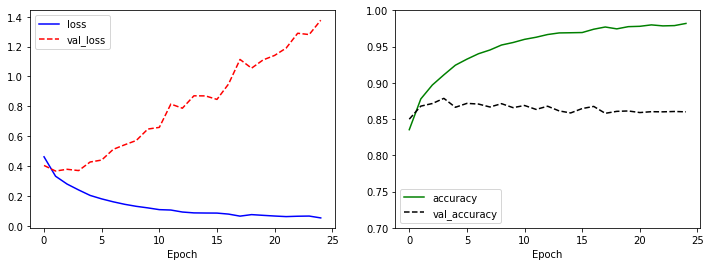

[1.4718522219374777, 0.8556]

In [20]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [22]:
# 컨벌루션 신경망 모델 정의 - 풀링 레이어, 드롭아웃 레이어 추가
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 7s 147us/sample - loss: 0.5372 - accuracy: 0.8055 - val_loss: 0.3730 - val_accuracy: 0.8620
Epoch 2/25
45000/45000 [==============================] - 6s 125us/sample - loss: 0.3633 - accuracy: 0.8669 - val_loss: 0.3270 - val_accuracy: 0.8811
Epoch 3/25
45000/45000 [==============================] - 6s 123us/sample - loss: 0.3216 - accuracy: 0.8832 - val_loss: 0.3276 - val_accuracy: 0.8827
Epoch 4/25
45000/45000 [==============================] - 6s 126us/sample - loss: 0.2923 - accuracy: 0.8937 - val_loss: 0.3124 - val_accuracy: 0.8872
Epoch 5/25
45000/45000 [==============================] - 6s 123us/sample - loss: 0.2711 - accuracy: 0.9007 - val_loss: 0.2953 - val_accuracy: 0.8956
Epoch 6/25
45000/45000 [==============================] - 5s 121us/sample - loss: 0.2515 - accuracy: 0.9083 - val_loss: 0.2892 - val_accuracy: 0.8987
Epoch 7/25
45000/45000 [==========================

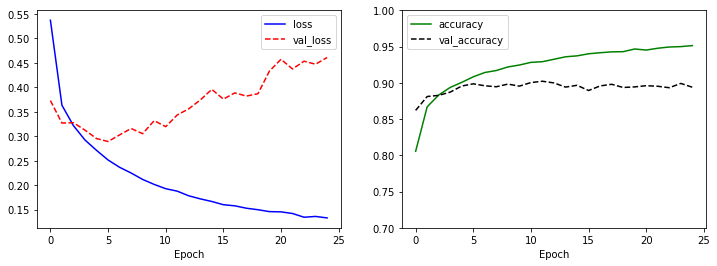

[0.47456640595123173, 0.8921]

In [23]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [24]:
# VGGNet 스타일의 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)        

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 11s 255us/sample - loss: 0.5982 - accuracy: 0.7836 - val_loss: 0.3308 - val_accuracy: 0.8731
Epoch 2/25
45000/45000 [==============================] - 10s 221us/sample - loss: 0.3778 - accuracy: 0.8642 - val_loss: 0.2930 - val_accuracy: 0.8927
Epoch 3/25
45000/45000 [==============================] - 10s 219us/sample - loss: 0.3306 - accuracy: 0.8798 - val_loss: 0.2649 - val_accuracy: 0.9018
Epoch 4/25
45000/45000 [==============================] - 10s 219us/sample - loss: 0.3073 - accuracy: 0.8890 - val_loss: 0.2402 - val_accuracy: 0.9131
Epoch 5/25
45000/45000 [==============================] - 10s 220us/sample - loss: 0.2940 - accuracy: 0.8939 - val_loss: 0.2281 - val_accuracy: 0.9145
Epoch 6/25
45000/45000 [==============================] - 10s 220us/sample - loss: 0.2829 - accuracy: 0.8985 - val_loss: 0.2400 - val_accuracy: 0.9114
Epoch 7/25
45000/45000 [====================

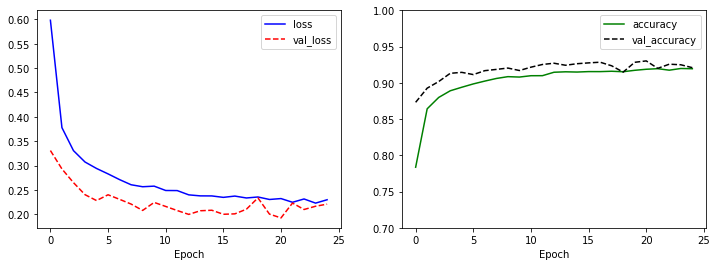

[0.23972547820806503, 0.9152]

In [25]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

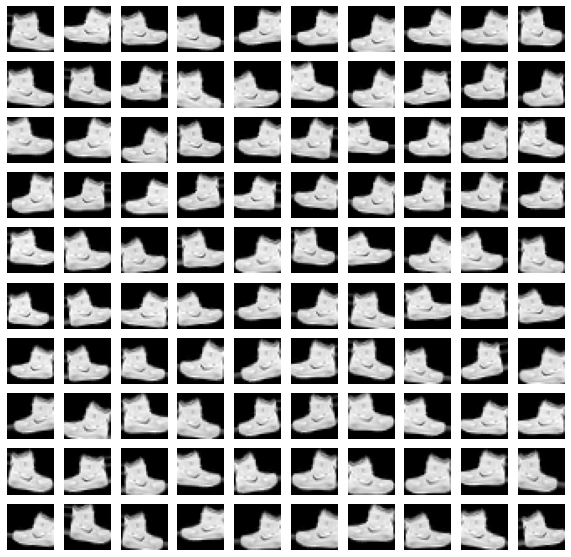

In [29]:
# Image Augmentation 데이터 표시
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False)

augment_size = 100

x_augmented = image_generator.flow(
    np.tile(train_X[0].reshape(28 * 28), 100).reshape(-1, 28, 28, 1),
    np.zeros(augment_size),
    batch_size = augment_size,
    shuffle = False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for c in range(100):
    plt.subplot(10, 10, c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28, 28), cmap='gray')

plt.show()

In [30]:
# 이미지 보강
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False)

augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(
    x_augmented,
    np.zeros(augment_size),
    batch_size = augment_size,
    shuffle = False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가합니다.
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


Train on 67500 samples, validate on 22500 samples
Epoch 1/25
67500/67500 [==============================] - 16s 240us/sample - loss: 0.5706 - accuracy: 0.7919 - val_loss: 0.5722 - val_accuracy: 0.7815
Epoch 2/25
67500/67500 [==============================] - 15s 219us/sample - loss: 0.3771 - accuracy: 0.8643 - val_loss: 0.5035 - val_accuracy: 0.8096
Epoch 3/25
67500/67500 [==============================] - 15s 223us/sample - loss: 0.3365 - accuracy: 0.8782 - val_loss: 0.4547 - val_accuracy: 0.8319
Epoch 4/25
67500/67500 [==============================] - 15s 226us/sample - loss: 0.3158 - accuracy: 0.8863 - val_loss: 0.4191 - val_accuracy: 0.8439
Epoch 5/25
67500/67500 [==============================] - 16s 236us/sample - loss: 0.3039 - accuracy: 0.8904 - val_loss: 0.4240 - val_accuracy: 0.8460
Epoch 6/25
67500/67500 [==============================] - 15s 222us/sample - loss: 0.2945 - accuracy: 0.8936 - val_loss: 0.4206 - val_accuracy: 0.8393
Epoch 7/25
67500/67500 [====================

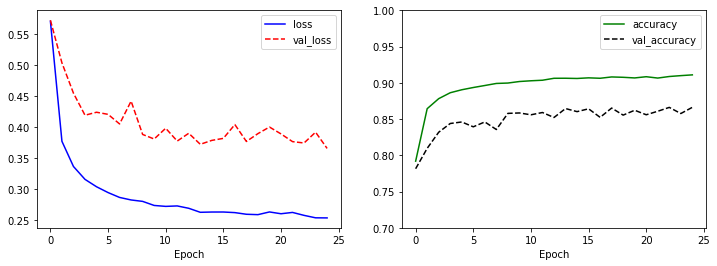

[0.20934348257780075, 0.9269]

In [31]:
# VGGNet style 네트워크 + 이미지 보강학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)